In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('life expectancy.csv')
df["Plus/Minus Life Expectancy from Previous Year"] = df.groupby("Country Name")["Life Expectancy World Bank"].diff()

Above is an added group that I found useful during the prep assignment, so I decided to keep it.

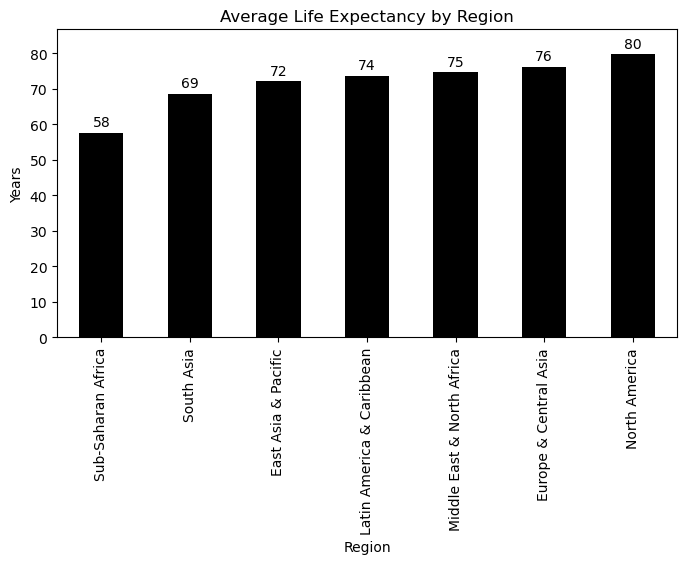

In [32]:
MeanLEByRegion= df.groupby('Region')['Life Expectancy World Bank'].mean().sort_values()
plt.figure(figsize=(8, 4))
ForLabels=MeanLEByRegion.plot(kind='bar', color='black')

plt.title("Average Life Expectancy by Region")
plt.ylabel("Years")
plt.xticks(rotation=90)
for i, v in enumerate(MeanLEByRegion):
    ForLabels.text(i, v+1.01,  # position label slightly above bar`
            f"{v:.0f}", # format value (rounded, no decimals)
            ha='center', va='bottom') # center alignment

plt.ylim(0, MeanLEByRegion.max() + 7)

plt.show()

Above shows life expectancy by region because I believe different factors in these regions come together to influence life expectancy. Although all others are fairly similar, NorthAmerica and SubSaharanAfrica vary a bit more from the group's average. The grouping allows us to see on a grand scale where these countries lie alongside the countries they neighbor.

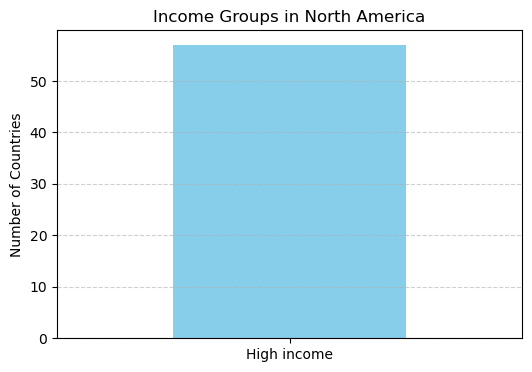

In [47]:
na = df[df["Region"] == "North America"]
NorthA_counts = na["IncomeGroup"].value_counts()
plt.figure(figsize=(6,4))
NorthA_counts.plot(kind='bar', color='skyblue')
plt.title("Income Groups in North America")
plt.ylabel("Number of Countries")
plt.xlabel("")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Socio-economic status can say a lot about quality of life. So I checked to see if maybe North America's Income groups may correlate with its above average Life Expectancy. This suggests a relationship between income groups of a region and its life expectancy. On a microscopic scale it may even suggest that a country's income groups could also affect life expectancnies in the demographic of that single country.  **Note:** It has so many countries because the region includes Canada, Bermuda, Mexico, and the US, but it is also for many different years of records

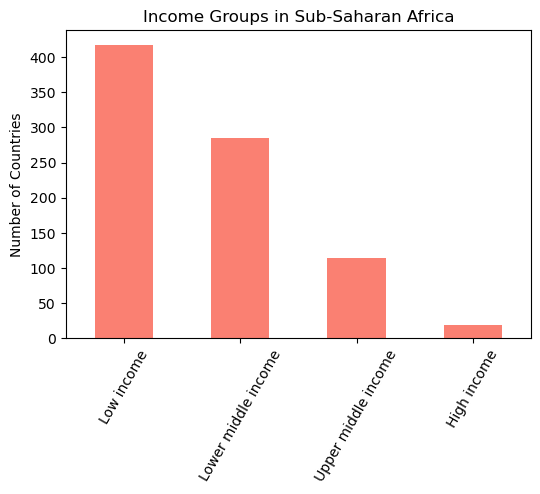

In [46]:
ssa = df[df["Region"] == "Sub-Saharan Africa"]
SubSahAfr_counts = ssa["IncomeGroup"].value_counts()
plt.figure(figsize=(6,4))
SubSahAfr_counts.plot(kind='bar', color='salmon')
plt.title("Income Groups in Sub-Saharan Africa")
plt.ylabel("Number of Countries")
plt.xlabel("")
plt.xticks(rotation=60)
plt.show()

Same thing as above for North America, but for SubSaharan Africa. I thought it would be worthwhile to view the difference (rather than just saying "it may correlate").

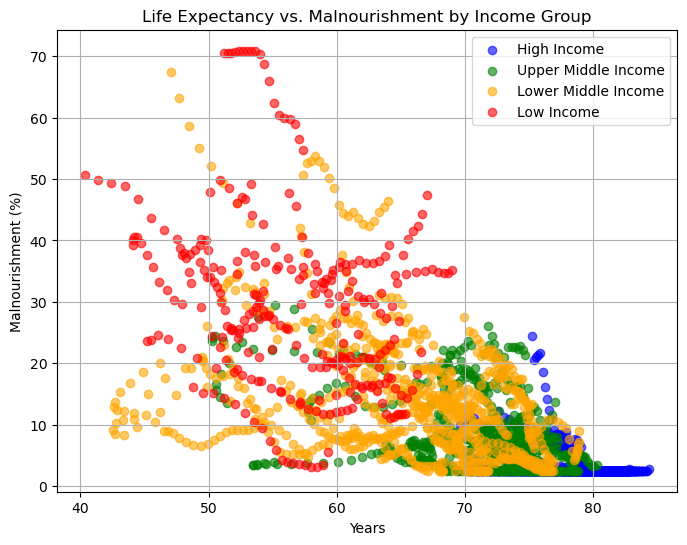

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(df[df["IncomeGroup"] == "High income"]["Life Expectancy World Bank"],df[df["IncomeGroup"] == "High income"]["Prevelance of Undernourishment"],
    color='blue', alpha=0.6, label="High Income")

plt.scatter(df[df["IncomeGroup"] == "Upper middle income"]["Life Expectancy World Bank"],df[df["IncomeGroup"] == "Upper middle income"]["Prevelance of Undernourishment"],
    color='green', alpha=0.6, label="Upper Middle Income")

plt.scatter(df[df["IncomeGroup"] == "Lower middle income"]["Life Expectancy World Bank"],df[df["IncomeGroup"] == "Lower middle income"]["Prevelance of Undernourishment"],
    color='orange', alpha=0.6, label="Lower Middle Income")

plt.scatter(df[df["IncomeGroup"] == "Low income"]["Life Expectancy World Bank"],df[df["IncomeGroup"] == "Low income"]["Prevelance of Undernourishment"],
    color='red', alpha=0.6, label="Low Income")

plt.title("Life Expectancy vs. Malnourishment by Income Group")
plt.xlabel("Years")
plt.ylabel("Malnourishment (%)")
plt.legend()
plt.grid(True)
plt.show()


A high population percentage of undernourishment correlates strongly negatively with the life Expectancy. And it is also notable that High Income countries have majorly small percentages of malnourishment. This all suggests that variables affected by money or GDP of a country affect the life expectancy. There may be further revelations if health expenditures were analyzed as well, and we can expect that the more money spent on health, the higher the life expectancy in a country.